In [3]:
# Carregando o dataset Boston Housing, disponível na biblioteca Sklearn
from sklearn.datasets import load_boston
boston = load_boston() # corrigindo a chamada da função load_boston com os parênteses

# Carregando as bibliotecas que serão usadas
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings 
warnings.filterwarnings("ignore") # suprimindo avisos
# tornando os gráficos do Matplotlib incorporados no notebook
%matplotlib inline

In [4]:
# Iniciando a Análise Exploratória do DataFrame

# Convertendo o Dataset em um DataFrame com Pandas
df = pd.DataFrame(boston.data, columns=boston.feature_names) # Correção dos erros aqui
df['target'] = boston.target
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


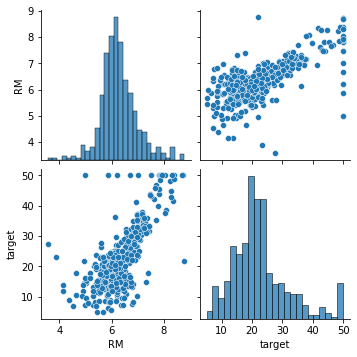

In [5]:
# Utilizando a visão gráfica da biblioteca seaborn
"""
Verificando quais viariáveis independentes (preditoras) apresentam visualmente correlação
com a variável dependente do dataset (Target).
É possível realizar uma visão geral de todo o dataframe, porém, para fins de visualização,
mostramos apenas as variáveis que apresentam maior correlação.
"""

# Verificando uma boa correlação entre as variáveis RM que representa o número médio de quartos nas casas
# e o valor da mediana da taxa de ocupação das casas em milhares de dólares

sb.pairplot(df[['RM', 'target']])

In [6]:
# Calculando a média da variável Target 
"""
Teorema do Limite Central - A distribuição das médias de uma amostra 
tende a aproximar de uma distribuição normal mesmo que a amostra não apresente essa tendência
"""

mediaDaPrevisao = df['target'].mean()
# Estimativa inicial para o valor previsto antes de criar o modelo de regressão.
mediaDaPrevisao

22.532806324110698

In [7]:
# Simulando o cálculo do SSE (Soma dos Quadrados dos Erros) para avaliar a qualidade do modelo de regressão.
# Criando uma série de dados chamada erroQuadrado que contém os erros ao quadrado entre o valor previsto (mediaDaPrevisao) 
# e o valor observado da variável target no conjunto de dados.
# Calculando o erro ao quadrado para cada observação no conjunto de dados, subtraindo do valor observado da variável Target
# pela média da variável target e elevando o resultado ao quadrado.

erroQuadrado = pd.Series(mediaDaPrevisao - df['target'])**2

# Somando todos os elementos da série erroQuadrado, obtendo assim a soma total dos erros ao quadrado. 

SSE = np.sum(erroQuadrado)

# Quanto menor o valor do SSE, melhor é o ajuste do modelo de regressão aos dados, 
# o que indica que o modelo é capaz de explicar a variação da variável dependente (target) de forma mais precisa.

print('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


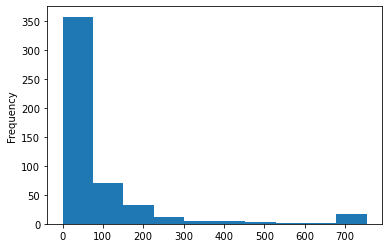

In [8]:
# Visualizando a curva normal para os quadrados dos erros

histPlot = erroQuadrado.plot(kind='hist')

In [9]:
#Conforme visualizado nos gráficos do seaborn, para Regressão Linear Simples 
#usaremos como variável explanatória a variável RM que representa o número médio de quartos nas casas.

# Imprimindo o desvio padrão via NumPy da variável RM

np.std(df['RM'])

0.7019225143345692

In [10]:
# Calculando o coeficiente de correlação de Pearson entre as variáveis preditoras (RM) e a variável dependente (Target)
from scipy.stats.stats import pearsonr
pearson_corr = pearsonr(df['RM'], df['target'])
print('Correlação a partir da função pearsonr: %0.5f' % pearson_corr[0])

Correlação a partir da função pearsonr: 0.69536


In [11]:
# Definindo os ranges x e y para visualização do gráfico de dispersão
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]                            

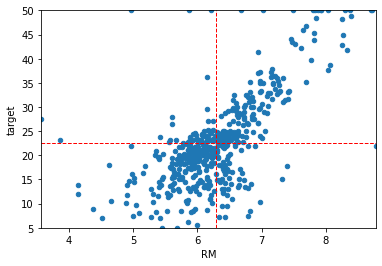

In [12]:
# Plotando dos valores de x e y com a média
scatter_plot = df.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)

# Calculando a média para avaliar a adequação de um modelo de regressão linear.
# Se a maioria dos pontos estiver acima ou abaixo da linha da média para uma variável, 
# isso indica que a relação entre essa variável e a outra é positiva ou negativa, respectivamente.
mean_y = scatter_plot.plot(x_range, [df['target'].mean(), df['target'].mean()], '--', color='red', linewidth=1)
mean_x = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color='red', linewidth=1)

In [13]:
#Criando um modelo de Regressão com StatsModels
#Inportando as Funções

import statsmodels.api as sm

In [14]:
#Seleção de caracteristicas para o treinamento 

x = df['RM']
y = df['target']

In [17]:
#Usando o comando sm.add_constant() do Statsmodels do Python que adiciona uma coluna de 1s ao conjunto de dados X. 
#Essa coluna é usada para representar a constante (ou intercepto) em um modelo de regressão linear, 
#ou seja, a estimativa do valor da variável de resposta quando todas as variáveis explicativas são iguais a zero.

x = sm.add_constant(x)
x.head(5)

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [24]:
#Criando o modelo de Regressão 
#O comando sm.OLS(y, X) da biblioteca Statsmodels do Python
#cria um modelo de regressão linear utilizando Ordinary Least Squares (OLS), 
#ou seja, Mínimos Quadrados Ordinários, como método de estimação.

modelo = sm.OLS(y, x)

#Treinando o Modelo
#O comando modelo.fit() da biblioteca Statsmodels do Python ajusta o modelo de regressão linear criado anteriormente 
#e retorna um objeto que contém os resultados da regressão.
#Esse objeto, geralmente armazenado em uma variável, contém informações sobre o ajuste do modelo aos dados, 
#como os coeficientes das variáveis independentes, o valor do intercepto, o erro padrão, 
#a estatística t, o p-valor, o R-quadrado e outras estatísticas relevantes.

modeloV1 = modelo.fit()
print (modeloV1.summary())
print (modeloV1.params)

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        10:35:53   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [27]:
#Verificando as previsões a partir do modelo ajustado 

previsoes = modeloV1.predict(x)
previsoes

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [34]:
#Realizando novas previsões com o modelo a partir de um chute 

RMp = 5
Targetp = np.array([1,RMp])

print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RMp,modeloV1.predict(Targetp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


In [35]:
#Gerando um ScatterPlot com a Linha de Regressão

# Definindo os ranges x e y para visualização do gráfico de dispersão
x_range = [df['RM'].min(), df['RM'].max()]
y_range = [df['target'].min(), df['target'].max()]   

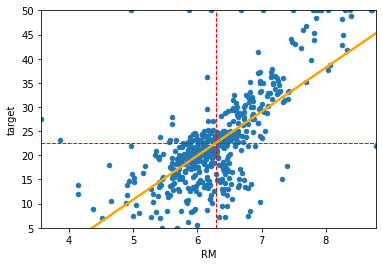

In [37]:
# Plotando dos valores de x e y com a média
# Primeira camada do Scatter Plot
scatter_plot = df.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)

# Segunda camada do Scatter Plot (médias)
# Calculando a média para avaliar a adequação de um modelo de regressão linear.
# Se a maioria dos pontos estiver acima ou abaixo da linha da média para uma variável, 
# isso indica que a relação entre essa variável e a outra é positiva ou negativa, respectivamente.
mean_y = scatter_plot.plot(x_range, [df['target'].mean(), df['target'].mean()], '--', color='red', linewidth=1)
mean_x = scatter_plot.plot([df['RM'].mean(), df['RM'].mean()], y_range, '--', color='red', linewidth=1)

# Terceira camada do Scatter Plot (linha de regressão)
regressionLine = scatter_plot.plot(df['RM'], previsoes, '-', color = 'orange', linewidth = 2)

In [40]:
# Gerando os resíduos

from sklearn.preprocessing import scale
residuos = df['target'] - previsoes
residuosNormalizados = scale(residuos)

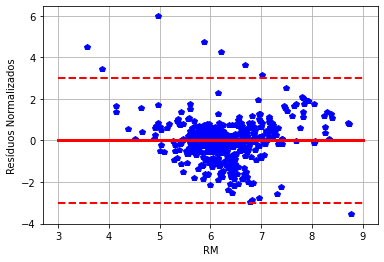

In [42]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(df['RM'], residuosNormalizados,'bp')
plt.xlabel('RM') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

In [46]:
#Criando um Modelo de Regressão com Scikit-Learn
#Inportando as Funções

from sklearn import linear_model

In [48]:
#Criando um objeto

#O parâmetro normalize define se as variáveis independentes devem ser normalizadas antes do ajuste do modelo. 
#Se normalize=True, as variáveis independentes serão escaladas para terem média zero e variância unitária 
#antes do ajuste do modelo. Isso pode ser útil quando as variáveis independentes têm escalas muito diferentes 
#e/ou desvios padrão muito grandes (alta dispersão na amostra).

#O parâmetro fit_intercept define se deve ser ajustado um intercepto (β0) para o modelo. 
#Se fit_intercept=True, o modelo terá um intercepto, caso contrário, o modelo será ajustado sem intercepto.

modeloV2 = linear_model.LinearRegression (normalize = False, fit_intercept = True)

In [54]:
# Define os valores de x (preditores) e y (dependentes)
#Quando usamos o Scikit-learn para realizar regressão, 
#é necessário formatar os dados de entrada (preditores ou variáveis independentes) em uma matriz, 
#mesmo que tenhamos apenas um único preditor. 
#Isso ocorre porque o Scikit-learn espera que os dados de entrada estejam no formato de matriz 
#para poder aplicar seus métodos e modelos de forma adequada.

observacoes = len(df)

# X deve sempre ser uma matriz e nunca um vetor: estamos transformando o vetor 'RM' em uma matriz bidimensional 
#com uma coluna e um número de linhas igual ao número de observações.

X = df['RM'].values.reshape((observacoes, 1))

# y pode ser um vetor: Não precisa ser transformado em uma matriz. Portanto, ela pode ser deixada no formato de vetor mesmo.

y = df['target'].values 

In [56]:
#Verificando os valores

type(X)

numpy.ndarray

In [60]:
np.ndim(X)

2

In [61]:
print (X)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

In [62]:
type(y)

numpy.ndarray

In [63]:
np.ndim(y)

1

In [64]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [66]:
#Treinamento do modelo de regressão linear 
#utilizando o método dos mínimos quadrados (OLS) sobre os dados de entrada X e saída y

modeloV2.fit(X,y)

LinearRegression()

In [67]:
print(modeloV2.coef_)
print(modeloV2.intercept_)

[9.10210898]
-34.67062077643857


In [68]:
#Mostrando previsões a partir do modelo

print(modeloV2.predict(X))

[25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997
 20.05125842 21.50759586 16.5833549  19.97844155 23.3735282  20.02395209
 18.93169901 19.47782555 20.81583557 18.43108302 19.35039603 19.85101202
 14.99048582 17.45715736 16.02812625 19.6234593  21.23453259 18.23993873
 19.25027283 16.29208741 18.23993873 20.36983223 24.44757706 26.07685456
 17.32972783 20.59738496 19.48692766 17.22050253 20.81583557 19.33219181
 18.49479778 18.57671676 19.63256141 25.35778795 29.26259271 26.95065703
 21.48028953 21.86257811 20.57007863 17.04756245 17.99418179 20.21509638
 14.47166561 16.31939374 19.60525508 20.98877564 24.5932108  19.92382889
 18.9225969  31.31056723 23.42814085 27.36935404 21.26183891 19.27757916
 17.58458688 19.63256141 24.09259481 26.87784015 29.99076143 22.58164472
 18.0032839  18.83157581 16.24657686 18.89529058 23.73761256 19.58705086
 20.53367019 22.17204981 22.42690886 22.54523628 22.48152152 21.21632837
 22.05372239 18.79516738 26.55926634 25.57623857 22

In [69]:
#Realizando novas previsões com o modelo a partir de um chute 
RM = 5
Xp = np.array(RM).reshape(-1, 1)

#Xp é uma matriz bidimensional criada a partir do valor de entrada RM usando o método np.array 
#em seguida, redimensionada com o método reshape(-1, 1). A chamada do método reshape 
#aqui é necessária porque o Scikit-learn espera que os dados de entrada tenham uma dimensão de duas colunas 
#(ou seja, uma matriz bidimensional) e, neste caso, estamos passando apenas um valor escalar RM.

#O argumento -1 usado no método reshape permite que o número de linhas da matriz seja determinado automaticamente,
#com base no número de elementos no vetor de entrada RM. O número de colunas é fixado como 1, 
#para garantir que a matriz resultante tenha duas dimensoes

print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modeloV2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8
